In [1]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import pickle

In [2]:
# Load data
train=pd.read_csv('sign_mnist_train.csv')

In [3]:
# Inspect data
train

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34622,1,135,119,108,102,105,99,61,103,121,...,108,112,116,114,118,180,184,176,167,163
34623,12,157,159,161,164,166,166,171,174,175,...,213,213,213,214,213,211,210,210,209,208
34624,2,190,191,190,191,190,190,192,192,191,...,216,215,213,214,214,213,210,211,209,208
34625,4,201,205,208,209,214,216,218,223,226,...,112,169,255,255,237,113,91,67,70,63


In [4]:
train.shape

(34627, 785)

In [5]:
# Get training labels
labels = train['label'].values
labels

array([3, 6, 2, ..., 2, 4, 2], dtype=int64)

In [6]:
# View the unique labels, 24 in total
unique_val = np.array(labels)
np.unique(unique_val)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24], dtype=int64)

<AxesSubplot:ylabel='count'>

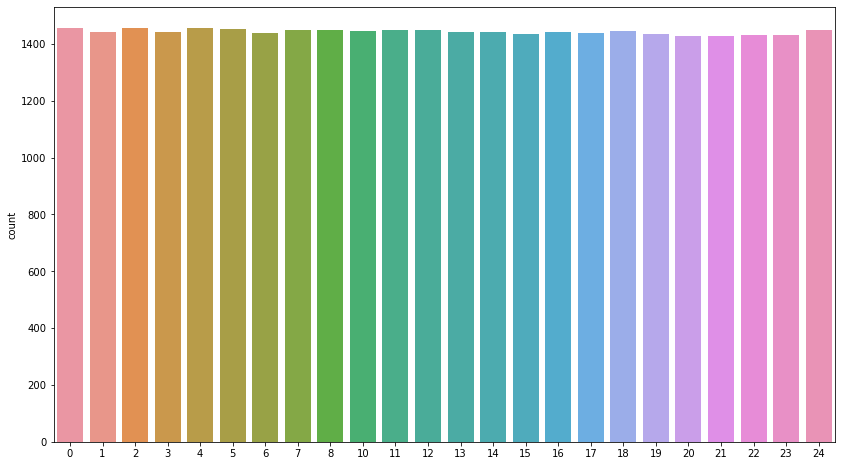

In [7]:
# Plot the quantities in each class
plt.figure(figsize = (14,8))
sns.countplot(x = labels)

In [8]:
# Drop training labels from the data so we can seperate it
train.drop('label', axis = 1, inplace = True)

In [9]:
# Extract the image data from each row in our csv
images = train.values

In [10]:
# Scale our images
images = images/255.0
images.shape

(34627, 784)

In [11]:
# Reshape them into the size required by TF and Keras
images = images.reshape(-1,28,28,1)
images.shape

(34627, 28, 28, 1)

In [12]:
# Hot one encode the labels
from sklearn.preprocessing import LabelBinarizer

label_binrizer = LabelBinarizer()
labels = label_binrizer.fit_transform(labels)
print(labels.shape)
labels

(34627, 24)


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0]])

[0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]


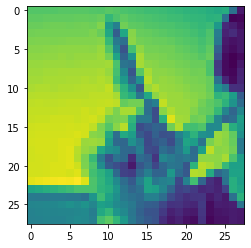

In [13]:
index = 40
print(labels[index])
plt.imshow(images[index].reshape(28,28))

In [14]:
# Split our data into x_train, x_test, y_train, y_test

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size=0.3, random_state=42)

print("x_train shape",x_train.shape)
print("x_test shape",x_test.shape)
print("y_train shape",y_train.shape)
print("y_test shape",y_test.shape)

x_train shape (24238, 28, 28, 1)
x_test shape (10389, 28, 28, 1)
y_train shape (24238, 24)
y_test shape (10389, 24)


In [15]:
# Create the CNN Model
from sklearn.metrics import confusion_matrix
import itertools
import tensorflow as tf

from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import RMSprop, Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau


model = tf.keras.models.Sequential([
                        tf.keras.layers.Conv2D(64, (3, 3), activation='relu',padding = 'same', input_shape=(28, 28, 1)),
                        tf.keras.layers.MaxPooling2D(2, 2),
                        tf.keras.layers.Conv2D(128, (3, 3),padding = 'same', activation='relu'),
                        tf.keras.layers.MaxPooling2D(2, 2),
                        tf.keras.layers.Conv2D(512, (3, 3),padding = 'same', activation='relu'),
                        tf.keras.layers.MaxPooling2D(2, 2),
                        
                        tf.keras.layers.Conv2D(512, (3, 3),padding = 'same', activation='relu'),
                        tf.keras.layers.Flatten(),
                        tf.keras.layers.Dense(512, activation='relu'),
                        tf.keras.layers.Dense(24, activation='softmax')])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 128)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 512)         590336    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 3, 512)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 512)         2

In [16]:
# Compile the model

model.compile( optimizer='rmsprop' , 
               loss = "categorical_crossentropy", 
               metrics=["accuracy"]
             )

In [17]:
epochs = 20 
batch_size = 128

In [18]:
#Data augmentation
datagen = ImageDataGenerator(
        featurewise_center=False,  
        samplewise_center=False,  
        featurewise_std_normalization=False,  
        samplewise_std_normalization=False, 
        zca_whitening=False,
        rotation_range=15, 
        zoom_range = 0.5,
        width_shift_range=0.15,  
        height_shift_range=0.15, 
        horizontal_flip=True,  
        vertical_flip=False)  

datagen.fit(x_train)

In [19]:
# Train the model
history = model.fit(datagen.flow(x_train,y_train, batch_size=batch_size),epochs = epochs, validation_data = (x_test,y_test), steps_per_epoch=x_train.shape[0] // batch_size)

Epoch 1/20
189/189 [==============================] - 321s 2s/step - loss: 2.9639 - accuracy: 0.1117 - val_loss: 2.3040 - val_accuracy: 0.2763
Epoch 2/20
189/189 [==============================] - 324s 2s/step - loss: 2.1500 - accuracy: 0.3202 - val_loss: 1.2733 - val_accuracy: 0.5672
Epoch 3/20
189/189 [==============================] - 333s 2s/step - loss: 1.4324 - accuracy: 0.5297 - val_loss: 0.5283 - val_accuracy: 0.8299
Epoch 4/20
189/189 [==============================] - 312s 2s/step - loss: 0.9561 - accuracy: 0.6740 - val_loss: 0.2812 - val_accuracy: 0.9145
Epoch 5/20
189/189 [==============================] - 388s 2s/step - loss: 0.6754 - accuracy: 0.7699 - val_loss: 0.2560 - val_accuracy: 0.9059
Epoch 6/20
189/189 [==============================] - 368s 2s/step - loss: 0.5015 - accuracy: 0.8324 - val_loss: 0.1434 - val_accuracy: 0.9576
Epoch 7/20
189/189 [==============================] - 364s 2s/step - loss: 0.3979 - accuracy: 0.8674 - val_loss: 0.0440 - val_accuracy: 0.9872

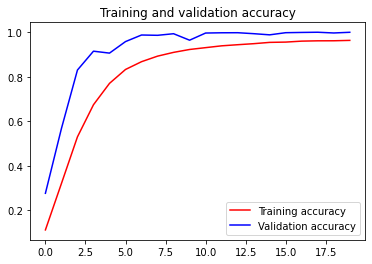

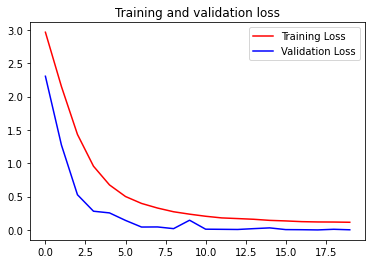

In [20]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [22]:
# Save model
model.save("sign-language-translator.h5")
print("Model Saved!")

Model Saved!


In [23]:
y_pred = model.predict(x_test)

In [24]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred.round())

0.9993262104148619